In [183]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# 문제1. 의사결정트리 사용
## Concrete.csv 파일 열기

In [128]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/Concrete.csv',engine='python',encoding='euc-kr')
df.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## 종속변수와 설명변수 나누기

In [129]:
df_y = df["CONCRETE_COMPRESSIVE_STRENGTH"]
df_x = df.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis=1,inplace = False)

## train, varidation, test 의 표본 0.4, 0.3, 0.3 으로 나누기

In [130]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3 ,random_state = 1234)
df_train_x, df_validation_x, df_train_y,df_validation_y = train_test_split(df_train_x,df_train_y,test_size = 0.428 ,random_state = 1234)

## 기본 의사결정트리에서의 3개의 표본데이터 설명력 확인

In [131]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

#train 설명력 확인
print(tree_uncustomized.score(df_train_x, df_train_y))
#train 설명력 확인
print(tree_uncustomized.score(df_validation_x, df_validation_y))
#test 설명력 확인
print(tree_uncustomized.score(df_test_x, df_test_y))

0.9998266197129749
0.6890945350899944
0.6994049238119568


## 최소 잎의 표본갯수를 선택하는 과정
### 최소 잎의 표본갯수가 4에서 격차가 낮은것을 알 수 있지만 너무 작은 표본이기에 과대적합 위험이 있기 때문에 7을 선택

In [141]:
train_score = []; validation_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,30)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['validationScore'] = validation_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,validationScore
0,1,1.000,0.689
1,2,0.984,0.688
2,3,0.962,0.688
3,4,0.948,0.718
4,5,0.918,0.681
5,6,0.908,0.678
6,7,0.889,0.679
7,8,0.876,0.671
8,9,0.862,0.659
9,10,0.857,0.663


## 그래프로 확인

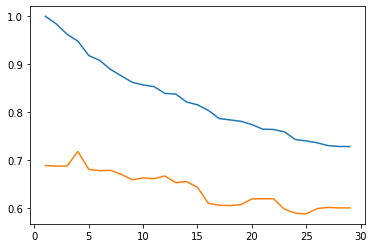

In [142]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "train score")
plt.plot(para_leaf, validation_score, linestyle = '-', label = "validation Score")

## 부모 노드에서 분리되는 노드의 최소 표본 갯수 선택
### split의 갯수가 30일때 score점수가 낮아 졌다가 높아져서 선택

In [143]:
train_score = []; validation_score = []
para_split = [n_split * 2 for n_split in range(1,30)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 6, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['validationScore'] = validation_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,validationScore
0,2,0.908,0.678
1,4,0.908,0.678
2,6,0.908,0.678
3,8,0.908,0.678
4,10,0.908,0.678
5,12,0.908,0.678
6,14,0.894,0.683
7,16,0.887,0.678
8,18,0.874,0.660
9,20,0.866,0.659


### 그래프로 확인

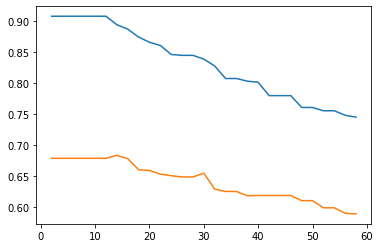

In [144]:
plt.plot(para_split, train_score, linestyle = '-', label = "train score")
plt.plot(para_split, validation_score, linestyle = '-', label = "validation Score")

## 트리의 깊이 설정
깊이가 7-> 8 으로 변할때 변동폭이 낮게 score점수가 올라 가는 것을 알 수 있기 때문에 깊이는 7로 선택 한다.

In [123]:
train_score = []; validation_score = []
para_depth = [depth * 1 for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 6, min_samples_split=14,max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['validationScore'] = validation_score
df_score_depth.round(3)

,Depth,TrainScore,validationScore
0,1,0.288,0.190
1,2,0.524,0.400
2,3,0.662,0.482
3,4,0.753,0.574
4,5,0.826,0.612
5,6,0.867,0.641
6,7,0.885,0.677
7,8,0.891,0.675
8,9,0.894,0.680
9,10,0.894,0.683


## 깊이의 그래프 확인

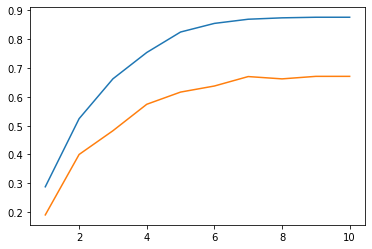

In [111]:
plt.plot(para_depth, train_score, linestyle = '-', label = "train score")
plt.plot(para_depth, validation_score, linestyle = '-', label = "validation Score")

## 최종 의사결정 트리 생성


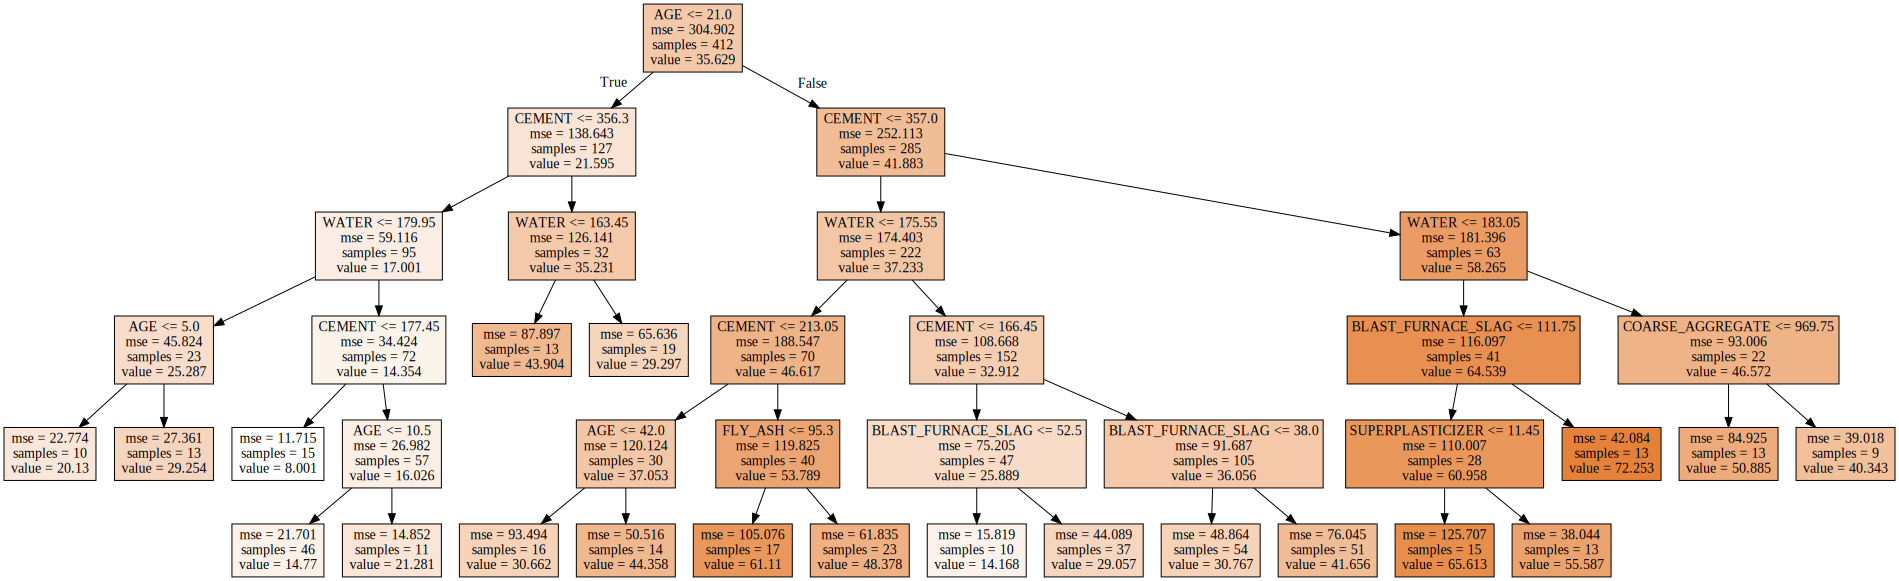

In [146]:
v_feature_name = df_train_x.columns
tree_final=DecisionTreeRegressor(random_state=1234, min_samples_leaf = 7, min_samples_split=30,max_depth=7)
tree_final.fit(df_train_x,df_train_y)

export_graphviz(tree_graph, out_file='tree_final.dot', feature_names = v_feature_name,impurity=True,filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 변수 중요도 확인
### 중요 설명변수 : 시멘트(CEMENT), 나이(AGE), 물(WATER)순으로 영향이 크다고 해석할 수 있음
### 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음

              Feature  Importance
0              CEMENT       0.373
7                 AGE       0.371
3               WATER       0.165
1  BLAST_FURNACE_SLAG       0.061
2             FLY_ASH       0.015
5    COARSE_AGGREGATE       0.009
6      FINE_AGGREGATE       0.006
4    SUPERPLASTICIZER       0.000


Text(0, 0.5, 'Variable')

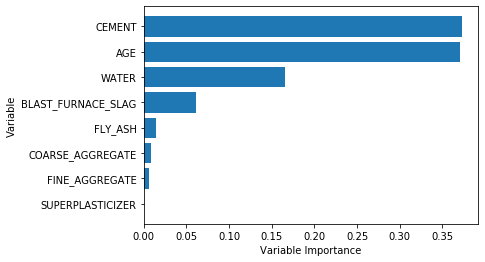

In [150]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
print(df_importance.round(3))


df_importance.sort_values("Importance", ascending =True , inplace= True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")



## test 데이터셋을 이용한 성능 확인
0.707정도의 성능을 갖는다.

In [147]:
tree_final.score(df_test_x, df_test_y)

0.7074527391249572

## MSE , MSA 값 추출

In [189]:
result = tree_final.predict(df_test_x)

MSE = mean_squared_error(result,df_test_y)
MSA = mean_absolute_error(result, df_test_y)
print("MSE: ",MSE,"MSA: ", MSA)

MSE:  77.92910677273674 MSA:  6.22156594295672


# 결론
## 최종적으로 선택된 의사결정트리는 깊이 = 7, 분리노드최소수치 = 30, 최소잎의수치 =7 로하여 생성 되었고, 30%의 test 데이터로 성능을 확인해 본 결과 0.707로 높은 수치의 정확도를 얻을 수 있었다.

# 문제2. 랜덤포레스트

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### 기본 랜덤포레스트로 가동한 train셋과 validation셋의 성능을 축력해 본다

In [153]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 설명력
print(rf_uncustomized.score(df_train_x,df_train_y))
print(rf_uncustomized.score(df_validation_x,df_validation_y))

0.9748442334979698
0.7929540095501107


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 무작위성으로 생성되는 약한 학습기를 몇개를 생성할지 score점수를 확인하여 선택한다.
100개를 생성 했을때 가장 스코어점수가 높고 격차가 낮기때문에 100을 선택

In [155]:
train_score=[]; varidation_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    varidation_score.append(rf.score(df_validation_x,df_validation_y))


df_score_n=pd.DataFrame()
df_score_n['n_estimator']= para_n_tree
df_score_n['TrainScore']= train_score
df_score_n['VaridationScore']= varidation_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.975,0.793
1,20,0.979,0.809
2,30,0.981,0.809
3,40,0.982,0.815
4,50,0.982,0.813
5,60,0.982,0.816
6,70,0.982,0.817
7,80,0.982,0.815
8,90,0.982,0.819
9,100,0.982,0.820


## 그래프를 만들어 확인

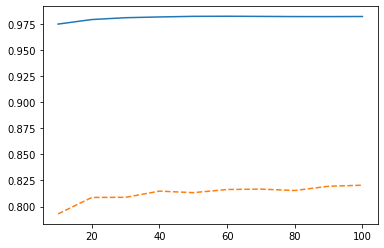

In [156]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = "train score")
plt.plot(para_n_tree, varidation_score, linestyle = '--', label = "varidation_score")

## 최소 잎의 표본갯수를 선택하는 과정
### 최소 잎의 표본갯수가 1에서 격차가 낮은것을 알 수 있다. 과대 적합이 될 수 있지만 VaridationScore역시 높은 score를 유지하고 있기때문에 1을 선택한다.

In [179]:
train_score=[]; varidation_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(n_estimators=100,min_samples_leaf=v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    varidation_score.append(rf.score(df_validation_x,df_validation_y))


df_score_leaf=pd.DataFrame()
df_score_leaf['leaf']= para_leaf
df_score_leaf['TrainScore']= train_score
df_score_leaf['VaridationScore']= varidation_score
df_score_leaf.round(3)

,leaf,TrainScore,VaridationScore
0,1,0.982,0.820
1,2,0.969,0.810
2,3,0.952,0.803
3,4,0.936,0.790
4,5,0.922,0.778
5,6,0.908,0.768
6,7,0.895,0.755
7,8,0.882,0.748
8,9,0.870,0.741
9,10,0.862,0.733


## 그래프를 만들어 확인한다.

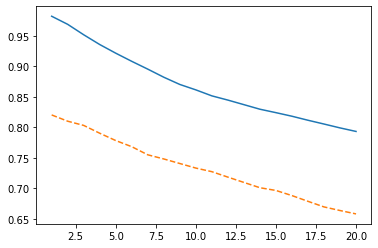

In [158]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "train score")
plt.plot(para_leaf, varidation_score, linestyle = '--', label = "varidation_score")

## 부모 노드에서 분리되는 노드의 최소 표본 갯수 선택
### split의 갯수가 4일때 score점수가 가장 높은것을 확인 할 수 있다. 과대 적합이 될 수 있지만 VaridationScore역시 높은 score를 유지하고 있기때문에 4를 선택한다.

In [162]:
train_score=[]; varidation_score = []
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(n_estimators=100,min_samples_leaf=1,min_samples_split=v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    varidation_score.append(rf.score(df_validation_x,df_validation_y))


df_score_split=pd.DataFrame()
df_score_split['split']= para_split
df_score_split['TrainScore']= train_score
df_score_split['VaridationScore']= varidation_score
df_score_split.round(3)

,split,TrainScore,VaridationScore
0,4,0.976,0.818
1,6,0.966,0.812
2,8,0.956,0.804
3,10,0.945,0.795
4,12,0.934,0.788
5,14,0.923,0.779
6,16,0.912,0.770
7,18,0.901,0.763
8,20,0.892,0.757
9,22,0.884,0.751


## 그래프로 확인

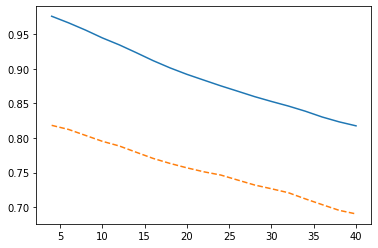

In [164]:
plt.plot(para_split, train_score, linestyle = '-', label = "train score")
plt.plot(para_split, varidation_score, linestyle = '--', label = "varidation_score")

## 트리의 깊이 설정
### 깊이가 10일때 score점수가 가장 높은 것을 확인 할 수 있다. 과대 적합이 될 수 있지만 VaridationScore역시 높은 score를 유지하고 있기때문에 10을 선택한다.

In [166]:
train_score=[]; varidation_score = []
para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(n_estimators=100,min_samples_leaf=1,min_samples_split=4, max_depth=v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    varidation_score.append(rf.score(df_validation_x,df_validation_y))


df_score_depth=pd.DataFrame()
df_score_depth['depth']= para_depth
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= varidation_score
df_score_depth.round(3)



,depth,TrainScore,TestScore
0,1,0.435,0.324
1,2,0.650,0.517
2,3,0.759,0.625
3,4,0.843,0.712
4,5,0.898,0.761
5,6,0.933,0.786
6,7,0.954,0.802
7,8,0.965,0.809
8,9,0.971,0.814
9,10,0.973,0.816


### 그래프 확인

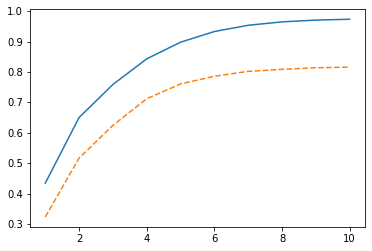

In [167]:
plt.plot(para_depth, train_score, linestyle = '-', label = "train score")
plt.plot(para_depth, varidation_score, linestyle = '--', label = "varidation_score")

### 랜덤포레스트로 생성된 하나의 의사결정트리 출력 및 확인
MSE값이 0에 근사하고 정확하게 예측하는 LEAF노드를 볼 수 있다.

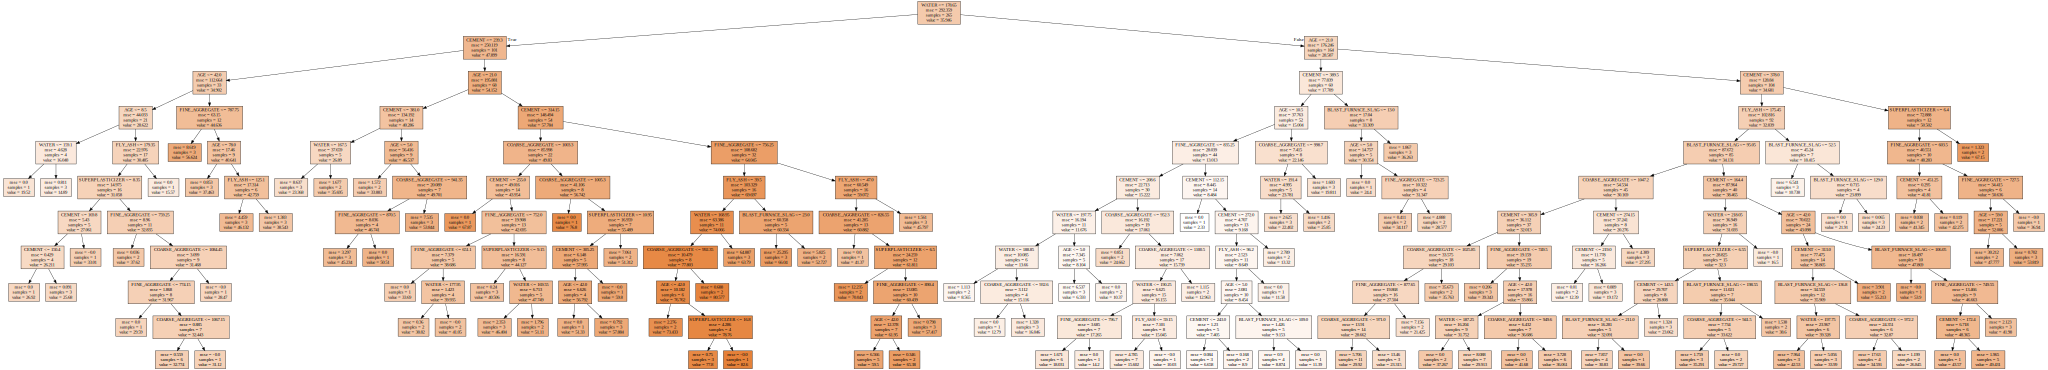

In [177]:

v_feature_name = df_train_x.columns


export_graphviz(rf_final.estimators_[0], out_file='tree_final.dot', feature_names = v_feature_name,impurity=True,filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


### 중요 설명변수 : 나이(AGE), 시멘트(CEMENT) , 물(WATER)순으로 영향이 크다고 해석할 수 있음
### 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음

              Feature  Importance
7                 AGE       0.311
0              CEMENT       0.283
3               WATER       0.228
1  BLAST_FURNACE_SLAG       0.056
6      FINE_AGGREGATE       0.041
5    COARSE_AGGREGATE       0.034
4    SUPERPLASTICIZER       0.024
2             FLY_ASH       0.024


Text(0, 0.5, 'Variable')

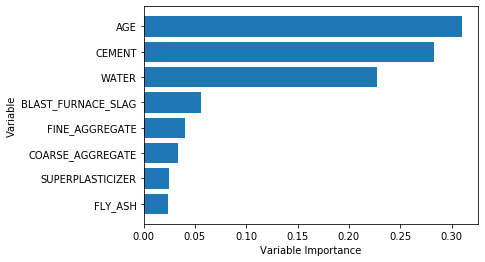

In [181]:

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
print(df_importance.round(3))

df_importance.sort_values("Importance", ascending =True , inplace= True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")


### 생성된 랜덤포레스트를 이용하여 마지막 test데이터셋의 성능을 확인한다.
확인한 결과 0.8502 로 높은 성능을 가지는 랜덤 포레스트가 생성된것으로 확인 했다.

In [182]:
rf_final = RandomForestRegressor(n_estimators=100,min_samples_leaf=1,min_samples_split=4, max_depth=10, random_state = 1234)
rf_final.fit(df_train_x,df_train_y)

print(rf_final.score(df_test_x, df_test_y))

0.8502239164828833


## MSE , MSA 값 추출

In [188]:
result = rf_final.predict(df_test_x)

MSE = mean_squared_error(result,df_test_y)
MSA = mean_absolute_error(result, df_test_y)
print("MSE: ",MSE,"MSA: ", MSA)

MSE:  39.024279894996944 MSA:  4.758488350988625


# 결론
### 최종적으로 선택된 랜덤포레스트는 생성된 의사결정트리=100, 깊이 = 10, 분리노드최소수치 = 4, 최소잎의수치 =1 로하여 생성 되었고, 30%의 test 데이터로 성능을 확인해 본 결과 0.8502로 높은 수치의 정확도를 얻을 수 있었다.

### 문제1. 의사결정트리를 이용했을때의 설명력 0.707보다 성능이 좋은 트리가 생성된것을 확인 할 수 있었다.